<a href="https://colab.research.google.com/github/shelernaz92/Automatic-Cause-Analysis-Tool/blob/main/Automatic_Cause_Analysis_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages

In [ ]:
# Turn off code warnings (this is not recommended for routine use)
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import classification_report

from IPython.display import Image
from sklearn import tree
import pydotplus


from numpy import array
from numpy import reshape


# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


#Importing needed libraries for exploration
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)




%matplotlib inline

# Import Files

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Book3_60_.csv to Book3_60_.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Book3_60_.csv']))
# Dataset is now stored in a Pandas Dataframe

# ***Data Exploration***

In [ ]:
len(data)

72

In [ ]:
data.shape

(72, 15)

In [ ]:
data.head()

,Station Code,Actual detection days,Average daily traffic,light,heavy,motorcycles,cars and small vans,cars and small vans with trailers,vans and minibuses,light trucks,heavy trucks,trucks with trailers and trailer trucks,articulated trucks,buses,Target
0,1,478,8064,7103,960,411.196653,6013,127.315900,552,247.238494,256.506276,122.280335,291.297071,43.161088,2
1,2,1483,13542,12163,1379,374.892081,10420,113.481430,1255,469.255781,344.440084,139.827610,415.915907,9.463910,3
2,3,1325,21885,20537,1349,775.679245,18483,138.711698,1140,527.520755,358.212830,123.481509,309.072453,30.255094,3
3,4,0,0,0,0,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,3
4,5,0,0,0,0,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,2


In [ ]:
data.tail(5)

,Station Code,Actual detection days,Average daily traffic,light,heavy,motorcycles,cars and small vans,cars and small vans with trailers,vans and minibuses,light trucks,heavy trucks,trucks with trailers and trailer trucks,articulated trucks,buses,Target
67,68,1352,25148,24345,702,644.630917,25606,3.340237,255,411.264793,165.650148,37.665680,23.432692,63.950444,3
68,69,1332,17696,16465,1221,141.085586,7926,13.069820,711,327.943694,500.254505,64.870120,168.874625,159.443694,3
69,70,578,11029,10454,568,78.863322,23442,1.323529,249,261.102076,187.456747,26.122837,33.832180,59.032872,3
70,71,1368,10878,10339,537,430.949561,15601,16.430556,327,188.659357,135.345029,10.713450,3.459795,198.609649,2
71,72,1365,1783,1568,200,49.501832,10124,4.670330,77,118.695971,56.130403,8.958242,11.722344,4.620513,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Station Code                             72 non-null     int64  
 1   Actual detection days                    72 non-null     int64  
 2   Average daily traffic                    72 non-null     int64  
 3   light                                    72 non-null     int64  
 4   heavy                                    72 non-null     int64  
 5   motorcycles                              72 non-null     float64
 6   cars and small vans                      72 non-null     int64  
 7   cars and small vans with trailers        72 non-null     float64
 8   vans and minibuses                       72 non-null     int64  
 9   light trucks                             72 non-null     float64
 10  heavy trucks                             72 non-null

In [ ]:
data.dtypes

Station Code                                 int64
Actual detection days                        int64
Average daily traffic                        int64
light                                        int64
heavy                                        int64
motorcycles                                float64
cars and small vans                          int64
cars and small vans with trailers          float64
vans and minibuses                           int64
light trucks                               float64
heavy trucks                               float64
trucks with trailers and trailer trucks    float64
articulated trucks                         float64
buses                                      float64
Target                                       int64
dtype: object

In [ ]:
print(data.columns)

Index(['Station Code', 'Actual detection days', 'Average daily traffic',
       'light', 'heavy', 'motorcycles', 'cars and small vans',
       'cars and small vans with trailers', 'vans and minibuses',
       'light trucks', 'heavy trucks',
       'trucks with trailers and trailer trucks', 'articulated trucks',
       'buses', 'Target'],
      dtype='object')


In [ ]:
#check Duplicated Rows

duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 15)


In [ ]:
#Drop Duplicated Rows

data = data.drop_duplicates()
data.head(5)

,Row Number,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Target
0,1,0,0,0,0,0,0,0
1,2,642,646,1159,1643,1455,2361,4
2,3,640,590,1105,1608,1459,2427,4
3,4,616,627,1192,1637,1466,2447,4
4,5,780,896,1438,1813,1489,2434,4


In [ ]:
#Check Missing or Null values

print(data.isnull().sum())

Station Code                               0
Actual detection days                      0
Average daily traffic                      0
light                                      0
heavy                                      0
motorcycles                                0
cars and small vans                        0
cars and small vans with trailers          0
vans and minibuses                         0
light trucks                               0
heavy trucks                               0
trucks with trailers and trailer trucks    0
articulated trucks                         0
buses                                      0
Target                                     0
dtype: int64


<Axes: xlabel='Target'>

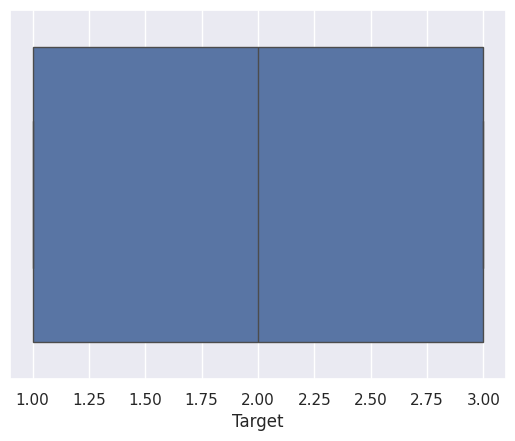

In [ ]:
#Detecting Outliers in 60%

sns.boxplot(x=data['Target'])

In [ ]:
#Detecting Outliers in 40%

sns.boxplot(x=data['Target'])

In [ ]:
#Outliers in 60%

sns.boxplot(x=data['Target'])

In [ ]:
#Outliers in 80%

sns.boxplot(x=data['Target'])

In [ ]:
#calculate the Outliers

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CO_GT             2.0000
PT08_S1_CO      300.5000
NMHC_GT           0.0000
C6H6_GT           9.6000
PT08_S2_NMHC    394.7500
Nox_GT          236.0000
PT08_S3_Nox     325.0000
NO2_GT           81.0000
PT08_S4_NO2     472.7500
PT08_S5_O3      556.7500
T                13.1000
RH               27.6000
AH                0.6064
dtype: float64


In [ ]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(6212, 16)

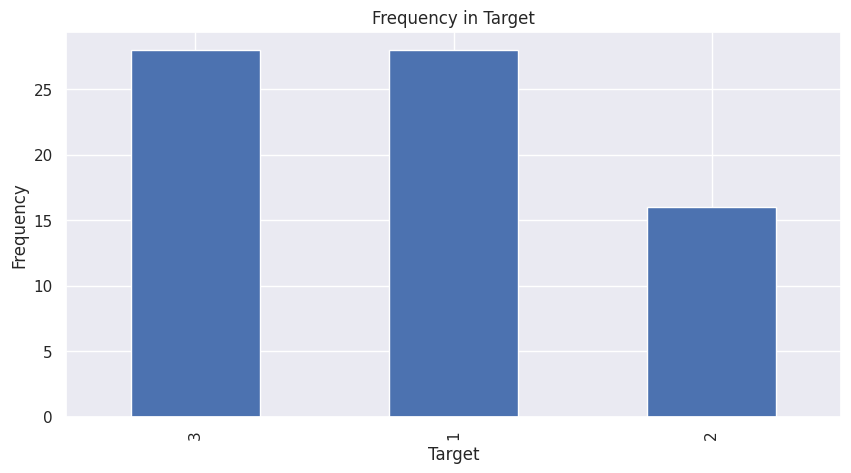

In [ ]:
#Frequency Plots

data.Target.value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title("Frequency in Target")
plt.ylabel('Frequency')
plt.xlabel('Target');

,Station Code,Actual detection days,Average daily traffic,light,heavy,motorcycles,cars and small vans,cars and small vans with trailers,vans and minibuses,light trucks,heavy trucks,trucks with trailers and trailer trucks,articulated trucks,buses,Target
Station Code,1.000000,-0.070022,-0.148583,-0.141815,-0.256010,-0.284645,0.021721,-0.425758,-0.331246,-0.222598,-0.173848,-0.375718,-0.387098,0.066039,-0.149281
Actual detection days,-0.070022,1.000000,0.731269,0.726622,0.705050,0.760027,0.715605,0.563792,0.681374,0.735692,0.672237,0.594010,0.552997,0.661778,0.057284
Average daily traffic,-0.148583,0.731269,1.000000,0.999569,0.931015,0.877193,0.832906,0.726624,0.860875,0.965759,0.890274,0.825567,0.771312,0.738978,0.416855
light,-0.141815,0.726622,0.999569,1.000000,0.922647,0.878298,0.837243,0.718648,0.852461,0.961124,0.880936,0.815984,0.759159,0.737101,0.418314
heavy,-0.256010,0.705050,0.931015,0.922647,1.000000,0.803695,0.739997,0.827878,0.950871,0.978204,0.961673,0.940257,0.931033,0.670217,0.425677
motorcycles,-0.284645,0.760027,0.877193,0.878298,0.803695,1.000000,0.734338,0.736708,0.785120,0.842417,0.699129,0.768439,0.691734,0.662041,0.274618
cars and small vans,0.021721,0.715605,0.832906,0.837243,0.739997,0.734338,1.000000,0.549603,0.655949,0.814638,0.702639,0.605254,0.564677,0.609774,0.290108
cars and small vans with trailers,-0.425758,0.563792,0.726624,0.718648,0.827878,0.736708,0.549603,1.000000,0.886429,0.796418,0.695759,0.901832,0.892791,0.419509,0.377375
vans and minibuses,-0.331246,0.681374,0.860875,0.852461,0.950871,0.785120,0.655949,0.886429,1.000000,0.924293,0.871550,0.953084,0.939296,0.568361,0.401207
light trucks,-0.222598,0.735692,0.965759,0.961124,0.978204,0.842417,0.814638,0.796418,0.924293,1.000000,0.926368,0.895234,0.874199,0.658720,0.431433


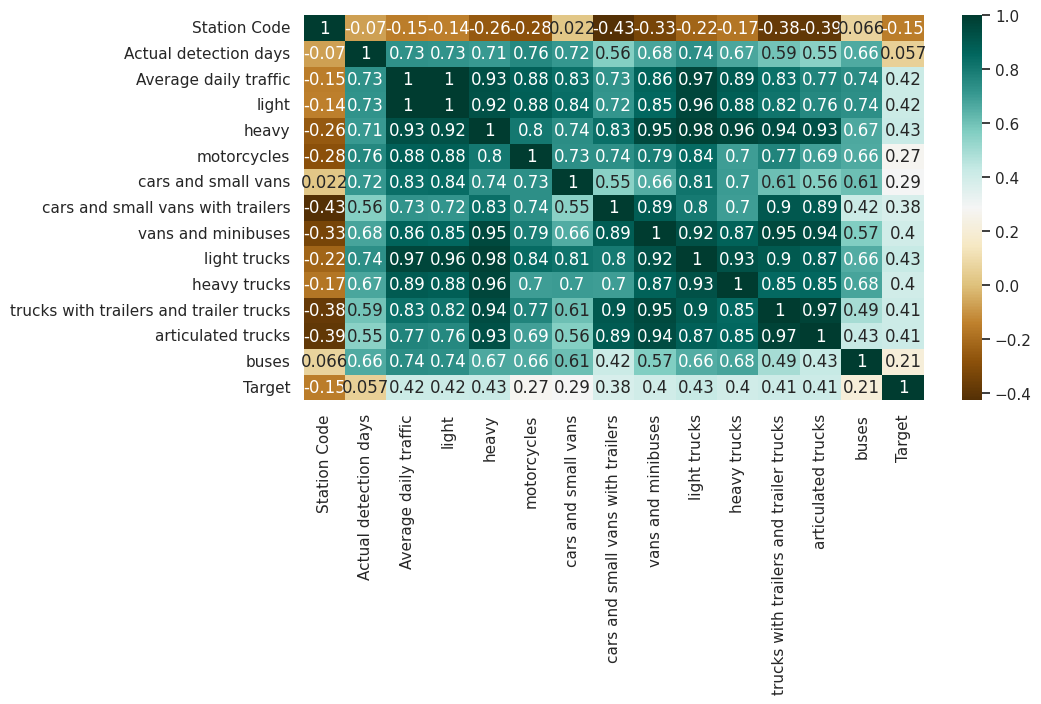

In [ ]:
#Heatmap to find depandant variables

plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
#scatterplot to find correlation between two variables

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['Sensor 1'], data['Target'])
ax.set_xlabel('Sensor 1')
ax.set_ylabel('Target')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['Sensor 1'], data['Target'])
ax.set_xlabel('Sensor 1')
ax.set_ylabel('Target')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['Sensor 1'], data['Target'])
ax.set_xlabel('Sensor 1')
ax.set_ylabel('Target')
plt.show()

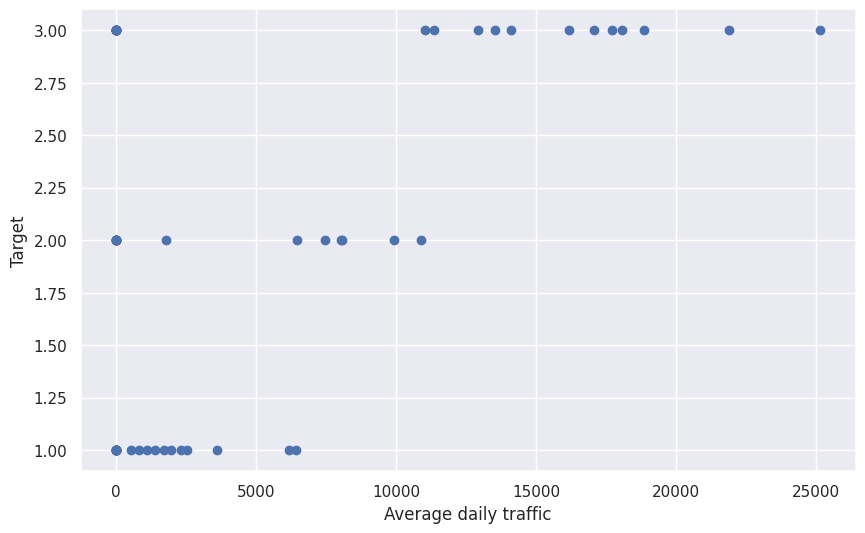

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['Average daily traffic'], data['Target'])
ax.set_xlabel('Average daily traffic')
ax.set_ylabel('Target')
plt.show()

# Anomaly Control

In [ ]:
import pandas as pd

# Convert data to numerical format
#data = pd.DataFrame({'col1': ['1', '2', '3'], 'col2': [4, 5, 6]})
#data['col1'] = pd.to_numeric(data['col1'])


#convert all the columns to integer

##data['DATAORA'] = pd.to_datetime(data['DATAORA'], format='%d%b%Y:%H:%M:%S')
##data['TIMESTAMP'] = data['DATAORA'].astype(np.int64) // 10**9

#data.drop('CO_level', axis=1, inplace=True)
#data.drop('Date', axis=1, inplace=True)
#data.drop('Time', axis=1, inplace=True)


# Replace NaN values with -1
#data.fillna(-1, inplace=True)

# Convert columns to integers

#data['PT08_S1_CO'] = data['PT08_S1_CO'].astype(int)
#data['NMHC_GT'] = data['NMHC_GT'].astype(int)
#data['C6H6_GT'] = data['C6H6_GT'].astype(int)
#data['PT08_S2_NMHC'] = data['PT08_S2_NMHC'].astype(int)
#data['Nox_GT'] = data['Nox_GT'].astype(int)
#data['PT08_S3_Nox'] = data['PT08_S3_Nox'].astype(int)
#data['NO2_GT'] = data['NO2_GT'].astype(int)
#data['PT08_S4_NO2'] = data['PT08_S4_NO2'].astype(int)
#data['PT08_S5_O3'] = data['PT08_S5_O3'].astype(int)
#data['T'] = data['T'].astype(int)
#data['RH'] = data['RH'].astype(int)
#data['AH'] = data['AH'].astype(int)


#calculate the number of 0 features


data_list = []
for i,row in data.iterrows():
  data_list.append((row.tolist().count(0)))
  #print("Row #", i, "=>", (row.tolist().count(0)))

# data_list has counts of number of 0's for every row
incomp_rowcheck = ["Incomplete row!" for row_count in data_list if row_count > 2]
if len(incomp_rowcheck) >= 2:
  print("Incomplete data!")


#check for undefined values

#Negative Values
Negative_value =((data) < 0).any().any()

print (Negative_value)




#Extreme Values
Extreme_p_value =(data > 500).any().any()

print(Extreme_p_value)

Extreme_n_value =(data < -100).any().any()

print(Extreme_n_value)


Incomplete data!
False
True
False




# Accuracy Prediction

In [ ]:
X = data.drop('Target', axis=1)
df = pd.DataFrame(X, columns=data.columns)
y = data['Target'] # Target variable

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#X, y = make_classification(n_samples=100, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape); print(X_test.shape)

X_train = X_train.dropna()
y_train = y_train.dropna()

#convert the target to Integer
y_train = y_train.astype(int)

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

(57, 14)
(15, 14)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))
g=classification_report(y_train,predict_train,output_dict=True)

[[23  0  0]
 [ 7  1  3]
 [10  1 12]]
              precision    recall  f1-score   support

           1       0.57      1.00      0.73        23
           2       0.50      0.09      0.15        11
           3       0.80      0.52      0.63        23

    accuracy                           0.63        57
   macro avg       0.62      0.54      0.51        57
weighted avg       0.65      0.63      0.58        57



In [ ]:
g['macro avg']
print(g)

{'1': {'precision': 0.9182795698924732, 'recall': 0.9065817409766455, 'f1-score': 0.9123931623931624, 'support': 471}, '2': {'precision': 0.8100436681222707, 'recall': 0.8568129330254042, 'f1-score': 0.8327721661054994, 'support': 433}, '3': {'precision': 0.7777777777777778, 'recall': 0.802547770700637, 'f1-score': 0.7899686520376176, 'support': 157}, '4': {'precision': 0.8769230769230769, 'recall': 0.8260869565217391, 'f1-score': 0.8507462686567164, 'support': 414}, 'accuracy': 0.8583050847457627, 'macro avg': {'precision': 0.8457560231788996, 'recall': 0.8480073503061065, 'f1-score': 0.846470062298249, 'support': 1475}, 'weighted avg': {'precision': 0.8599429496091953, 'recall': 0.8583050847457627, 'f1-score': 0.8586858040709473, 'support': 1475}}


# Cause Analysis

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


accuracy=accuracy_score(y_train,predict_train)
precision=precision_score(y_train,predict_train, average='macro')
recall=recall_score(y_train,predict_train, average='macro')



# Rule System

if len(incomp_rowcheck) >= 2:
  print("Incomplete data")

if Negative_value == True:
  print("Incorrect data")

if accuracy>90 and precision<70 and recall<70:
   print("Over-Fitting")
else:
   print("accuracy=", accuracy, "precision=", precision, "recall=", recall, "No Over_Fitting")

if accuracy<65 and precision>70 and recall>70:
  print("wrong Training")
else:
   print("accuracy=", accuracy, "precision=", precision, "recall=", recall, "No Wrong Training")

if accuracy>95 and precision>95 and recall>95:
  print("Ask an Expert")
else:
  print("accuracy=", accuracy, "precision=", precision, "recall=", recall, "No Need to Ask an Expert")

if abs(accuracy - recall) < 0.30:
  print("Row Situation")
else:
  print("accuracy=", accuracy, "precision=", precision, "recall=",recall, "No Row Situation Detected")
if abs(precision - recall) < 0.30:
  print("Feature Situation")
else:
  print("accuracy=", accuracy, "precision=", precision, "recall=",recall, "No Feature Situation Detected")

if precision > accuracy and recall > accuracy:
  print("Variable-Sized")
else:
  print("Equal-Sized")

#########################

#Heatmap
  # Our DataFrame is called 'data'
correlation_matrix = data.corr()

# Calculate the total number of elements in the correlation matrix
total_elements = correlation_matrix.size

# Count the number of negative correlation coefficients
negative_count = (correlation_matrix < 0).sum().sum()

# Calculate the percentage of negative correlation coefficients
negative_percentage = (negative_count / total_elements) * 100

# Check the condition and print the appropriate message
if negative_percentage > 80:
    print("Feature Situation")
else:
    print("Row Situation")


Incorrect data
accuracy= 0.8583050847457627 precision= 0.8457560231788996 recall= 0.8480073503061065 No Over_Fitting
accuracy= 0.8583050847457627 precision= 0.8457560231788996 recall= 0.8480073503061065 No Wrong Training
accuracy= 0.8583050847457627 precision= 0.8457560231788996 recall= 0.8480073503061065 No Need to Ask an Expert
Row Situation
Feature Situation
Equal-Sized
Row Situation


In [ ]:
import pandas as pd

def check_random_distribution(data, threshold_consecutive_rows):
    consec_zeros = 0
    consec_negatives = 0

    for i in range(len(data)):
        row = data.iloc[i]

        if (row == 0).all():
            consec_zeros += 1
            consec_negatives = 0
        elif (row < 0).any():
            consec_negatives += 1
            consec_zeros = 0
        else:
            consec_zeros = 0
            consec_negatives = 0

        if consec_zeros > threshold_consecutive_rows or consec_negatives > threshold_consecutive_rows:
            return False

    return True

# Example usage:
# Assuming you have your data stored in a pandas DataFrame named 'data'
# Threshold for consecutive rows with 0 or negative values
threshold_consecutive_rows = 1

# Call the check_random_distribution function
result = check_random_distribution(data, threshold_consecutive_rows)

# Print the outcome
if result:
    print("Feature Situation")
else:
    print("Row Situation Detected")


Row Situation Detected


In [ ]:
#Heatmap time series

# Our DataFrame is called 'data'
correlation_matrix = data.corr()

# Create a modified version of the correlation matrix with incorrect values
modified_matrix = correlation_matrix.copy()

# Replace some values in the modified matrix with incorrect values
# Randomly replace 20% of the values with incorrect values (-1)
incorrect_percentage = 0.2
mask = np.random.choice([True, False], size=correlation_matrix.shape, p=[incorrect_percentage, 1-incorrect_percentage])
modified_matrix[mask] = -1

# Calculate the correlation coefficient for the original and modified matrices
original_coefficient = correlation_matrix.values.flatten().mean()
modified_coefficient = modified_matrix.values.flatten().mean()

# Check the condition and print the appropriate message
if modified_coefficient < original_coefficient:
    print("Incorrect or Incomplete Row Data")
else:
    print("Incomplete or Incorrect Feature Data")

Incorrect or Incomplete Row Data
